In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress 

## Read data from file

In [2]:
df = pd.read_csv('epa-sea-level.csv')

## This displays the first 5 rows of the dataframe

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


## The dataframe has 134 rows and 5 columns

In [4]:
df.shape

(134, 5)

## There are no missing values

In [5]:
df.isna().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

## There are no duplicated rows

In [6]:
df[df.duplicated()].shape

(0, 5)

## This shows the datatypes of the various columns

In [7]:
df.dtypes

Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

## This gets the years columns as a numpy array

In [8]:
years = df.Year.values

## This gets the year values of all the year after 2000

In [9]:
years2000 = df[df.Year >= 2000]['Year'].values

## This gets the value of the first year

In [10]:
first_year = df.iloc[df.Year.idxmin()].Year
first_year

1880.0

## This gets the CSIRO Adjusted Sea Level columns as a numpy array

In [11]:
level = df['CSIRO Adjusted Sea Level'].values

## This gets the CSIRO Adjusted Sea Level columns values after the year 2000 as a numpy array

In [12]:
level200 = df[df.Year >= 2000]['CSIRO Adjusted Sea Level'].values

## This creates a numpy array of years from the first year to 2050 increasing it by 1 everytime

In [13]:
ext_year = np.arange(first_year, 2051, 1)

## This creates a numpy array of years from the 2000 to 2050 increasing it by 1 everytime

In [14]:
ext_year2000 = np.arange(2000, 2051, 1)

## This gets the slope, intercept among other values using the years and the levels

In [15]:
res1 = linregress(years, level)

## This gets the slope, intercept among other values using the years after 2000 and the levels of the years after 2000

In [16]:
res2 = linregress(years2000, level200)

## This plots a scatter plot with the first line of best fits

Text(0.5, 1.0, 'Sea Level Predictor')

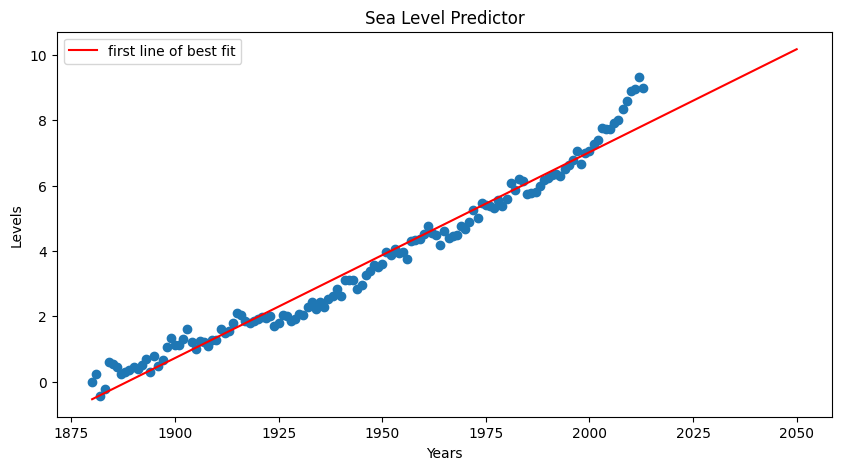

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(years, level)
plt.plot(ext_year, res1.intercept + res1.slope * ext_year, 'r', label='first line of best fit')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Levels')
plt.title('Sea Level Predictor')

## This plots a scatter plot with two line of best fits one green and the other red 

Text(0.5, 1.0, 'Sea Level Predictor')

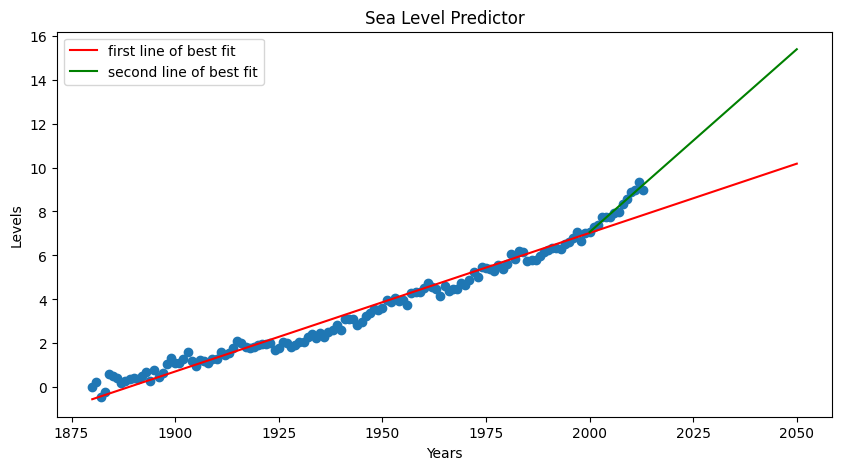

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(years, level)
plt.plot(ext_year, res1.intercept + res1.slope * ext_year, 'r', label='first line of best fit')
plt.plot(ext_year2000, res2.intercept + res2.slope * ext_year2000, 'g', label='second line of best fit')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Levels')
plt.title('Sea Level Predictor')

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress 

def draw_plot():
    df = pd.read_csv('epa-sea-level.csv')
    plt.figure(figsize=(10, 5))
    years = df.Year.values
    levels = df['CSIRO Adjusted Sea Level'].values
    first_year = df.iloc[df.Year.idxmin()].Year
    ext_year = range(int(first_year), 2050, 1)
    year_2000 = df[df.Year >= 2000].Year.values
    level_2000 = df[df.Year >= 2000]['CSIRO Adjusted Sea Level'].values
    ext_year_2000 = range(2000, 2050, 1)
    res_1 = linregress(years, levels)
    res_2 = linregress(year_2000, level_2000)
    plt.scatter(years, levels)
    plt.plot(ext_year, res_1.intercept + res_1.slope * ext_year, 'r', label='First Line Of Best Fit')
    plt.plot(ext_year_2000, res_2.intercept + res_2.slope * ext_year_2000, 'g', label='Second Line Of Best Fit')
    plt.xlabel('Year')
    plt.ylabel('CSIRO Adjusted Sea Level')
    plt.title('Sea Level Predictor')
    plt.legend()
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot: title={'center': 'Sea Level Predictor'}, xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

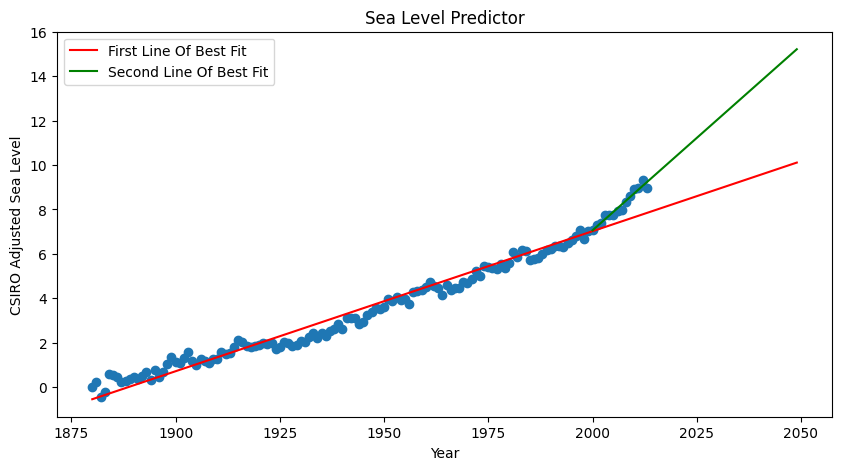

In [20]:
draw_plot()